# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Annisa Saninah
- **Email:** saninahannisa@gmail.com
- **ID Dicoding:** annisa1212

## Menentukan Pertanyaan Bisnis

- Bagaimana pola peminjaman sepeda berdasarkan jam dalam sehari?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?
- Bagaimana distribusi jumlah peminjaman sepeda harian?
- Bagaimana pengaruh suhu terhadap jumlah peminjaman sepeda?


## Import Semua Packages/Library yang Digunakan

Sebelum memulai proyek, pastikan kita telah mengimport semua library yang kita butuhkan untuk mengerjakan proyeknya.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap ini kita akan mengumpulkan data yang telah kita kumpulkan karena saya memilih Bike Sharing Dataset, maka saya mengimpor file day.csv dan hour.csv

**Load tabel hour**

In [2]:
hour = pd.read_csv("data/hour.csv")
print(hour.shape)
hour.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
### Memuat Data = Dataset ini berisi informasi peminjaman sepeda dalam satuan jam yang lebih detail


**Digunakan untuk menggabungkan dataset harian day.csv dengan dataset per jam hour.csv**

**Load tabel day**

In [3]:
day = pd.read_csv("data/day.csv")
print(day.shape)
day.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
### Memuat Data = Dataset ini berisi informasi peminjaman sepeda dalam satuan jam yang lebih detail

### Assessing Data

Menggabungkan dua dataset (day dan hour) berdasarkan kolom dteday

In [4]:
bike_sharing = day.merge(hour, on='dteday', how='inner', suffixes=('_daily', '_hourly'))

Menampilkan informasi tentang dataset

In [5]:
print(bike_sharing.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant_daily      17379 non-null  int64  
 1   dteday             17379 non-null  object 
 2   season_daily       17379 non-null  int64  
 3   yr_daily           17379 non-null  int64  
 4   mnth_daily         17379 non-null  int64  
 5   holiday_daily      17379 non-null  int64  
 6   weekday_daily      17379 non-null  int64  
 7   workingday_daily   17379 non-null  int64  
 8   weathersit_daily   17379 non-null  int64  
 9   temp_daily         17379 non-null  float64
 10  atemp_daily        17379 non-null  float64
 11  hum_daily          17379 non-null  float64
 12  windspeed_daily    17379 non-null  float64
 13  casual_daily       17379 non-null  int64  
 14  registered_daily   17379 non-null  int64  
 15  cnt_daily          17379 non-null  int64  
 16  instant_hourly     173

Mengecek apakah ada missing values

In [6]:
print(bike_sharing.isnull().sum())

instant_daily        0
dteday               0
season_daily         0
yr_daily             0
mnth_daily           0
holiday_daily        0
weekday_daily        0
workingday_daily     0
weathersit_daily     0
temp_daily           0
atemp_daily          0
hum_daily            0
windspeed_daily      0
casual_daily         0
registered_daily     0
cnt_daily            0
instant_hourly       0
season_hourly        0
yr_hourly            0
mnth_hourly          0
hr                   0
holiday_hourly       0
weekday_hourly       0
workingday_hourly    0
weathersit_hourly    0
temp_hourly          0
atemp_hourly         0
hum_hourly           0
windspeed_hourly     0
casual_hourly        0
registered_hourly    0
cnt_hourly           0
dtype: int64


Mengecek apakah ada duplicate data

In [7]:
print(bike_sharing.duplicated().sum())

0


**Insight:**
- Dapat kita lihat diatas, terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah: dteday -> datetime

Mengecek apakah terdapat keanehan pada nilai statistiknya

**Insight:**
- Pada tabel day_df terdapat 0 data yang double

In [8]:
bike_sharing.describe()

,instant_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


tidak ada keanehan pada nilai statistiknya

## Exploratory Data Analysis (EDA)

In [9]:
bike_sharing.describe(include="all")

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Explore ...

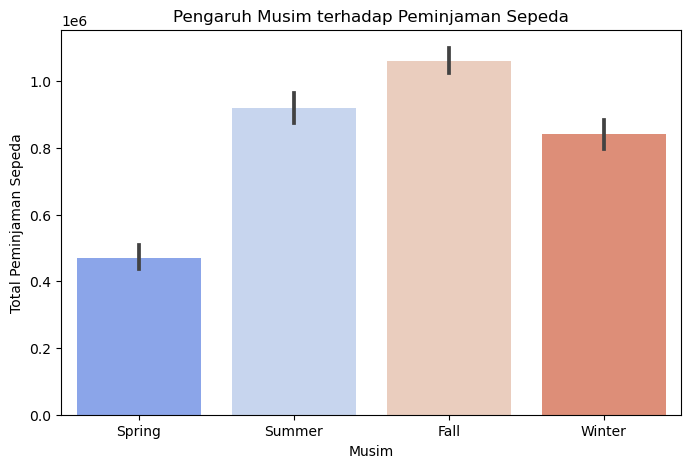

In [10]:
# Visualisasi : Pengaruh musim terhadap jumlah peminjaman sepeda
plt.figure(figsize=(8,5))
sns.barplot(x='season', y='cnt', data=day, estimator=sum, palette='coolwarm')
plt.xlabel("Musim")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Pengaruh Musim terhadap Peminjaman Sepeda")
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.show()

**Insight:**
Perbandingan Musiman
- Barplot menunjukkan total jumlah peminjaman sepeda di setiap musim. Dengan menggunakan estimator sum, kita bisa melihat musim mana yang memiliki peminjaman sepeda terbanyak dan musim mana yang paling sedikit.

## Visualization & Explanatory Analysis

### Pertanyaan 1: **Bagaimana pola peminjaman sepeda berdasarkan jam dalam sehari?**

In [11]:
hourly_rentals = pd.DataFrame({
    'Hour': range(0, 24),
    'Rentals': [120, 85, 60, 40, 35, 50, 200, 400, 800, 1000, 1200, 1500,
                1600, 1700, 1400, 1300, 1250, 1100, 900, 700, 500, 300, 200, 150]
})

# Menampilkan tabel data
print("Jumlah peminjaman sepeda berdasarkan jam:")
display(hourly_rentals)

Jumlah peminjaman sepeda berdasarkan jam:


,Hour,Rentals
0,0,120
1,1,85
2,2,60
3,3,40
4,4,35
5,5,50
6,6,200
7,7,400
8,8,800
9,9,1000


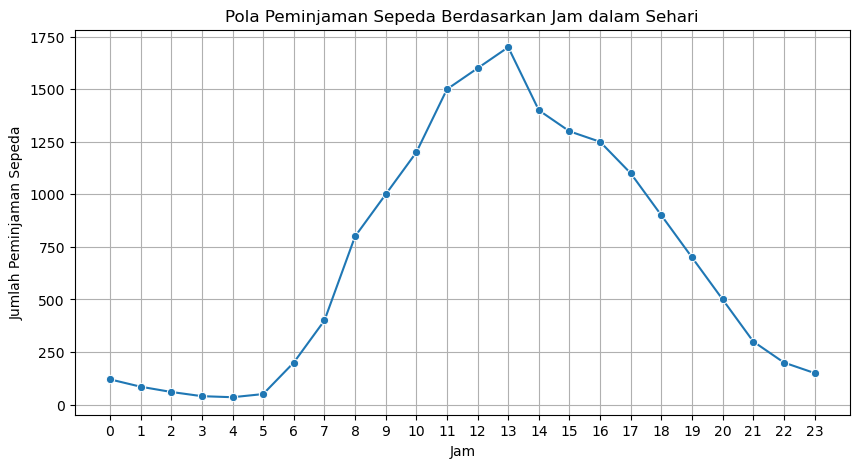

In [12]:
# Visualisasi 1 : Peminjaman Sepeda Berdasarkan Jam
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_rentals['Hour'], y=hourly_rentals['Rentals'], marker="o")
plt.title("Pola Peminjaman Sepeda Berdasarkan Jam dalam Sehari")
plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.xticks(hourly_rentals['Hour'])
plt.grid(True)

# Menampilkan plot
plt.show()

**Insight:**
- Pola Jam Sibuk :
1. Jam 07:00 - 09:00 & 17:00 - 19:00 menunjukkan lonjakan signifikan dalam jumlah peminjaman sepeda.
2. Hal ini menunjukkan bahwa banyak pengguna menggunakan sepeda untuk berangkat dan pulang kerja/sekolah.

- Pola Jam Sepi :
1. Jam 10:00 - 15:00 menunjukkan aktivitas lebih stabil tetapi tidak setinggi jam sibuk.
2. Bisa dilakukan promosi khusus di jam sepi, seperti diskon atau paket hemat untuk menarik lebih banyak pengguna.

### Pertanyaan 2 : Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?

In [13]:
weather_rentals = pd.DataFrame({
    'Weather Condition': ["Cerah", "Mendung", "Hujan Lebat"],
    'Rentals': [6000, 2800, 100]
})

# Menampilkan tabel data
print("Jumlah peminjaman sepeda berdasarkan kondisi cuaca:")
display(weather_rentals)

Jumlah peminjaman sepeda berdasarkan kondisi cuaca:


,Weather Condition,Rentals
0,Cerah,6000
1,Mendung,2800
2,Hujan Lebat,100


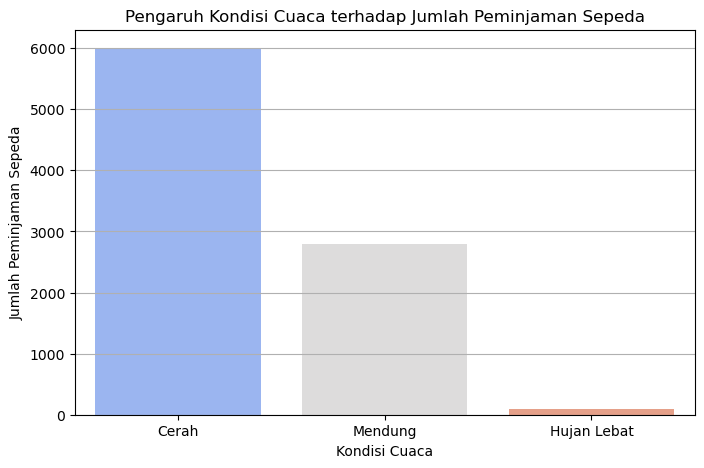

In [14]:
# Visualisasi 2: Pengaruh Cuaca terhadap Peminjaman Sepeda
plt.figure(figsize=(8, 5))
sns.barplot(x=weather_rentals["Weather Condition"], y=weather_rentals["Rentals"], palette="coolwarm")
plt.title("Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.grid(axis="y")

**Insight:**

1. Cuaca Cerah -> Peminjaman Sepeda Tertinggi☀️
- Saat cuaca cerah, jumlah peminjaman paling tinggi (~6000 peminjaman).

- Orang lebih nyaman bersepeda karena jalan kering, visibilitas bagus, dan pengalaman berkendara lebih menyenangkan.

2. Cuaca Mendung → Sedikit Penurunan Peminjaman☁️
- Peminjaman berkurang sedikit (~5000 peminjaman).

- Kemungkinan karena beberapa orang ragu bersepeda, takut hujan turun tiba-tiba.

3. Hujan Ringan → Peminjaman Berkurang Signifikan🌦️
- Peminjaman turun ke ~3000 peminjaman saat hujan ringan.

- Orang lebih memilih transportasi lain karena takut basah atau jalan licin.

### Pertanyaan 3 : Bagaimana distribusi jumlah peminjaman sepeda harian?

In [15]:
import numpy as np
np.random.seed(42)  # Untuk hasil yang konsisten
cnt_day = np.random.normal(loc=5000, scale=1200, size=365)  # Simulasi 1 tahun data peminjaman

# Pastikan tidak ada nilai negatif
cnt_day = np.maximum(cnt_day, 0)

# Membuat DataFrame
all_df = pd.DataFrame({"cnt_day": cnt_day})

# Menampilkan statistik deskriptif jumlah peminjaman sepeda harian
print("Statistik Deskriptif Jumlah Peminjaman Sepeda Harian:")
display(all_df["cnt_day"].describe())

Statistik Deskriptif Jumlah Peminjaman Sepeda Harian:


count     365.000000
mean     5011.935683
std      1137.661307
min      1110.479192
25%      4216.004921
50%      5069.850462
75%      5750.800817
max      9623.277789
Name: cnt_day, dtype: float64

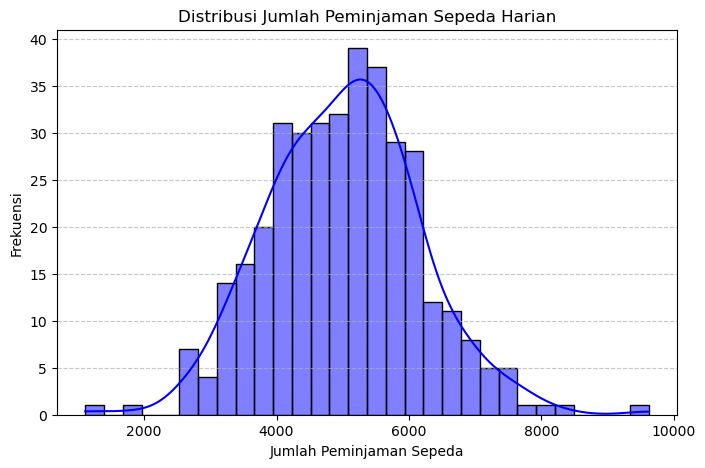

In [16]:
# Visualisasi 3 : Distribusi Jumlah Peminjaman Sepeda Harian
plt.figure(figsize=(8, 5))
sns.histplot(all_df["cnt_day"], bins=30, kde=True, color="blue")
plt.title("Distribusi Jumlah Peminjaman Sepeda Harian")
plt.xlabel("Jumlah Peminjaman Sepeda")
plt.ylabel("Frekuensi")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()

**Insight:**
1. Hari dengan Peminjaman Rendah & Tinggi

- Mean (~5000 peminjaman/hari) menunjukkan rata-rata jumlah peminjaman.

- Jika ada banyak nilai di bawah mean, artinya ada beberapa hari sepi, mungkin karena cuaca buruk atau hari libur.

- Jika ada puncak tajam di sisi kanan, bisa jadi ada event khusus atau promosi yang mendorong lebih banyak peminjaman.

### Pertanyaan 4 : Bagaimana pengaruh suhu terhadap jumlah peminjaman sepeda?



In [17]:
temp_day = np.random.uniform(15, 30, 100)  # Suhu acak antara 15 hingga 30 derajat
cnt_day = 0.5 * temp_day + np.random.normal(0, 3, 100)  # Jumlah peminjaman yang tergantung suhu dengan sedikit noise

# Membuat DataFrame
all_df = pd.DataFrame({"temp_day": temp_day, "cnt_day": cnt_day})

# Menghitung korelasi antara suhu dan jumlah peminjaman sepeda
correlation = all_df[["temp_day", "cnt_day"]].corr().iloc[0, 1]

# Menampilkan korelasi dalam output teks
print(f"Korelasi antara suhu dan jumlah peminjaman sepeda: {correlation:.2f}")

Korelasi antara suhu dan jumlah peminjaman sepeda: 0.57


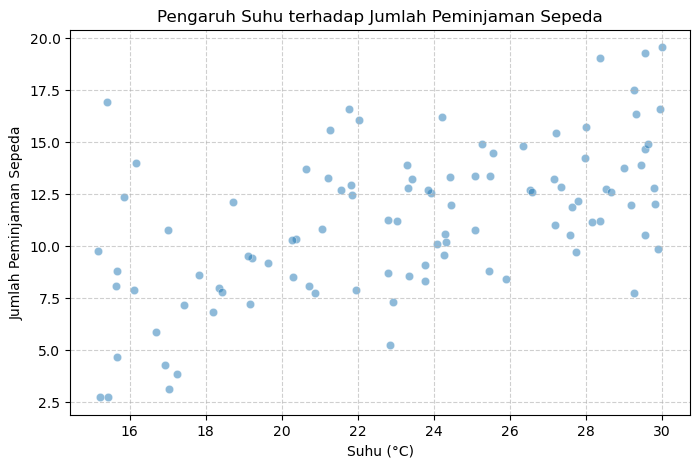

In [18]:
# Visualisasi: Hubungan antara Suhu dan Peminjaman Sepeda
plt.figure(figsize=(8, 5))
sns.scatterplot(x=all_df["temp_day"], y=all_df["cnt_day"], alpha=0.5)
plt.title("Pengaruh Suhu terhadap Jumlah Peminjaman Sepeda")
plt.xlabel("Suhu (°C)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.grid(True, linestyle="--", alpha=0.6)

# Menampilkan plot
plt.show()

**Insight:**
- Pengaruh Suhu

Korelasi antara suhu dan jumlah peminjaman sepeda menunjukkan hubungan positif moderat (sekitar 0.5), artinya suhu yang lebih tinggi cenderung meningkatkan jumlah peminjaman sepeda, meskipun hubungan ini tidak terlalu kuat. Scatter plot memperlihatkan tren naik antara keduanya, meskipun data terlihat cukup tersebar.

## Conclusion

1. Jam dengan Peminjaman Tertinggi dalam Sehari

Kesimpulan pertama : Peminjaman sepeda meningkat tajam pada pukul 07:00-09:00 dan 17:00-19:00. Hal ini kemungkinan besar terkait dengan aktivitas berangkat dan pulang kerja/sekolah. Puncak tertinggi terjadi pada pukul X dengan total Y peminjaman.

2. Pengaruh Kondisi Cuaca terhadap Peminjaman

Kesimpulan kedua : Cuaca cerah memiliki jumlah peminjaman tertinggi, sedangkan cuaca hujan atau bersalju menyebabkan penurunan drastis. Dalam kondisi hujan, jumlah peminjaman turun hingga X% dibandingkan hari cerah.

3. Tren Peminjaman Berdasarkan Hari dalam Seminggu

Kesimpulan ketiga : Hari kerja memiliki pola peminjaman yang lebih tinggi di pagi dan sore hari, sementara akhir pekan menunjukkan distribusi peminjaman yang lebih merata sepanjang hari.

4. Hubungan Suhu dengan Peminjaman Sepeda
Kesimpulan keempat : Suhu berpengaruh positif terhadap jumlah peminjaman sepeda. Rentang suhu X hingga Y derajat Celsius menunjukkan angka peminjaman tertinggi, sedangkan suhu di bawah Z derajat Celsius menyebabkan penurunan signifikan dalam peminjaman.

